In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:
survey_responses = pd.read_csv("Success Factors Study.csv")

In [3]:
sr = survey_responses.copy()
#sr.head()

In [4]:
sr.drop(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address'], axis=1, inplace = True)

In [5]:
sr.drop(['Email Address', 'First Name', 'Last Name', 'Custom Data 1'], axis=1, inplace = True)

In [6]:
sr.drop(["What faculty are you in?", "Unnamed: 10"], axis=1, inplace=True)

In [7]:
holder = "Please enter your email address.**We assure you that we strip emails from the rest of the data and make sure that all analysis remains anonymous. We will use emails to build a mailing list and send you the result of our study."
sr.drop([holder], axis=1, inplace=True)
sr.drop(["What is the scale of your GPA?"], axis=1, inplace=True)

In [8]:
sr.drop(sr.index[0], inplace=True)
sr.head()


,On average how many courses do you take per semester? (only take into account fall/winter semesters),How many hours do you work per week at a job unrelated to school?,"On average, how many days in a week do you not study at all? By studying we mean any work that you do for school. Don't include attending lectures/tutorials/labs","On a day that you do study, how many hours do you study?","Finally, what is your gpa?"
1,5,0,1,10,3.49
2,5,21-25,4,9,2.5
3,4,21-25,1,6,2.5
4,4,0,2,5,2.83
5,4,11-15,3,6,3.7


In [9]:
q1 = "On average how many courses do you take per semester? (only take into account fall/winter semesters)"
q2 = "How many hours do you work per week at a job unrelated to school?"
q3 = "On average, how many days in a week do you not study at all? By studying we mean any work that you do for school. Don't include attending lectures/tutorials/labs"
q4 = "On a day that you do study, how many hours do you study?"
q5 = "Finally, what is your gpa?"
sr.rename(columns={q1: "Courses", q2: "Work", q3: "Days_Break", q4: "Study_Hours", q5: "GPA"}, inplace=True)
#sr.head()

In [10]:
sr['GPA'] = pd.to_numeric(sr['GPA']);
sr['Courses'] = pd.to_numeric(sr['Courses']);
sr['Days_Break'] = pd.to_numeric(sr['Days_Break']);

In [11]:
sr['Study_Hours'].replace("11+", 11, inplace=True);
sr['Study_Hours'] = pd.to_numeric(sr['Study_Hours']);

In [12]:
list_a = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31+"]
list_b = [3, 8, 13, 18, 23, 28, 31]
sr['Work'].replace(list_a, list_b, inplace=True);
sr['Work'] = pd.to_numeric(sr['Work'])


In [13]:
sr.head()
corr_matrix = sr.corr()
corr_matrix["GPA"].sort_values(ascending=False)

GPA            1.000000
Courses        0.078525
Study_Hours   -0.089598
Days_Break    -0.179787
Work          -0.201984
Name: GPA, dtype: float64

In [14]:
courses, work, days_break, study_hours, gpa = [], [], [], [], []
courses, work, days_break, study_hours, gpa = sr['Courses'], sr['Work'], sr['Days_Break'], sr['Study_Hours'], sr['GPA']


In [15]:
gpa_copy = gpa.sort_values()

In [16]:
gpa_copy

172    0.000
138    0.000
141    0.100
115    0.100
118    1.970
38     2.000
37     2.000
32     2.000
86     2.200
204    2.290
192    2.300
64     2.300
122    2.300
97     2.350
131    2.400
6      2.500
2      2.500
3      2.500
45     2.500
9      2.500
24     2.500
31     2.500
199    2.500
183    2.530
69     2.580
119    2.600
80     2.600
155    2.600
91     2.700
130    2.700
       ...  
14     3.900
26     3.900
144    3.900
52     3.900
76     3.900
210    3.940
194    3.970
187    3.980
127    3.990
209    4.000
10     4.000
21     4.000
89     4.000
20     4.000
46     4.000
71     4.030
180    4.040
189    4.100
140    4.100
82     4.100
208    4.120
206    4.153
120    4.200
205    4.200
186    4.200
51     4.230
109    4.230
190    4.280
43     4.300
156    4.300
Name: GPA, Length: 211, dtype: float64

In [17]:
gpa_copy = gpa_copy.drop_duplicates()
gpa_copy = gpa_copy.iloc[2:]


<Figure size 432x288 with 0 Axes>

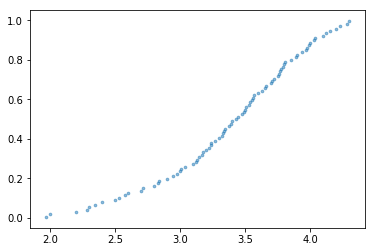

<Figure size 432x288 with 0 Axes>

In [18]:
js = [j+1 for j in range(0, len(gpa_copy))]
prob_dis = [(j-0.5) / (len(js)) for j in js]
plt.scatter(gpa_copy, prob_dis, s=7, alpha=0.5)
plt.show
plt.figure()


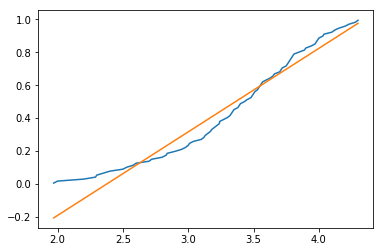

In [19]:
import numpy as np
from numpy.polynomial.polynomial import polyfit

b, m = polyfit(gpa_copy, prob_dis, 1)
plt.plot(gpa_copy, prob_dis)
plt.plot(gpa_copy, b + m * gpa_copy, '-')
plt.show()


In [20]:
gpa_2 = gpa.sort_values()
gpa_2 = gpa_2.iloc[4:]
gpa_2 = gpa_2.round(decimals=1)
counts = gpa_2.value_counts()
gpas = gpa_2.drop_duplicates()

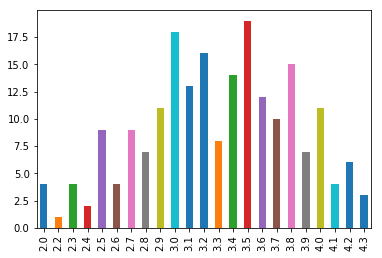

In [27]:
counts = counts.sort_index()

counts.plot(kind = 'bar')
